Verteilungsschätzung für Spalte Hour1:
Mittelwert: 0.02361813703681962
Standardabweichung: 0.20950624946142926
Geschätzte Verteilung: Normalverteilung mit Mittelwert 0.02361813703681962 und Standardabweichung 0.20950624946142926
Verteilungsschätzung für Spalte Hour2:
Mittelwert: -0.009670830919555635
Standardabweichung: 0.18893065880965518
Geschätzte Verteilung: Normalverteilung mit Mittelwert -0.009670830919555635 und Standardabweichung 0.18893065880965518
Verteilungsschätzung für Spalte Hour3:
Mittelwert: 9.710070807217987e-05
Standardabweichung: 0.17771392060945834
Geschätzte Verteilung: Normalverteilung mit Mittelwert 9.710070807217987e-05 und Standardabweichung 0.17771392060945834
Verteilungsschätzung für Spalte Hour4:
Mittelwert: 0.009554433259359207
Standardabweichung: 0.17147019265888683
Geschätzte Verteilung: Normalverteilung mit Mittelwert 0.009554433259359207 und Standardabweichung 0.17147019265888683
Verteilungsschätzung für Spalte Hour5:
Mittelwert: 0.020008785914142548
St

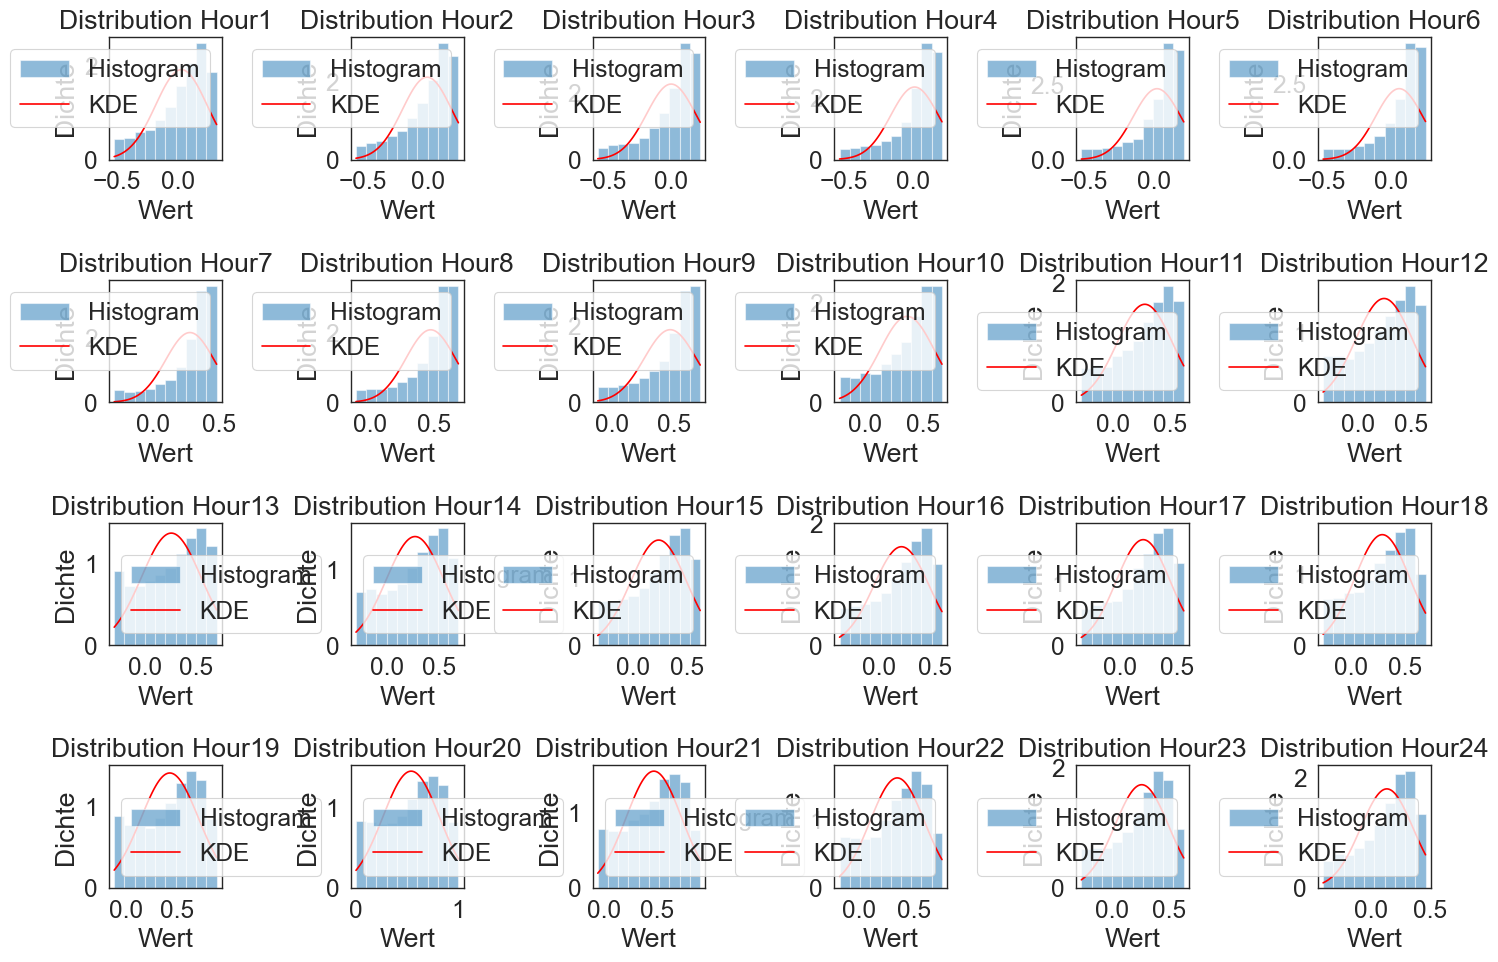

In [87]:
#Normalverteilungsapproximation
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from openpyxl import load_workbook

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Schätzung der Verteilung, Mittelwert und Standardabweichung für jede Spalte
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6
fig, axs = plt.subplots(num_rows, 6, figsize=(15, 2.5 * num_rows))

for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    kde = np.histogram(df[col], density=True)
    
    # Mittelwert und Standardabweichung
    mean = np.mean(df[col])
    std = np.std(df[col])
    
    # Ausgabe der Ergebnisse
    print('Verteilungsschätzung für Spalte {}:'.format(col))
    print('Mittelwert:', mean)
    print('Standardabweichung:', std)
    
    # Histogramm
    axs[row_idx, col_idx].hist(df[col], bins=10, density=True, alpha=0.5, label='Histogram')
    
    # KDE-Plot
    x_axis = np.linspace(df[col].min(), df[col].max(), 100)
    kde_values = norm.pdf(x_axis, loc=mean, scale=std)
    axs[row_idx, col_idx].plot(x_axis, kde_values, 'r-', label='KDE')
    
    # Ausgabe der Formel für die geschätzte Verteilung
    print('Geschätzte Verteilung: Normalverteilung mit Mittelwert {} und Standardabweichung {}'.format(mean, std))
    
    # Plot anzeigen
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_title('Distribution {}'.format(col))
    axs[row_idx, col_idx].set_xlabel('Wert')
    axs[row_idx, col_idx].set_ylabel('Dichte')
    
# Überflüssige Plots entfernen
for i in range(num_cols, num_rows * 6):
    fig.delaxes(axs.flatten()[i])
    
plt.tight_layout()
plt.show()


In [1]:
#Beta verteilung verbessert nur positive Werte
import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check_positive.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Schätzung der Verteilung, Mittelwert und Standardabweichung für jede Spalte
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6
fig, axs = plt.subplots(num_rows, 6, figsize=(15, 2.5 * num_rows))

for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    params = beta.fit(df[col], floc=0, fscale=1)
    dist = beta(*params)
    
    # Mittelwert und Standardabweichung
    mean = np.mean(df[col])
    std = np.std(df[col])
    
    # Ausgabe der Ergebnisse
    print('Verteilungsschätzung für Spalte {}:'.format(col))
    print('Mittelwert:', mean)
    print('Standardabweichung:', std)
    
    # Histogramm und KDE-Plot
    axs[row_idx, col_idx].hist(df[col], bins=10, density=True, alpha=0.5, label='Histogram')
    x_axis = np.linspace(df[col].min(), df[col].max(), 100)
    axs[row_idx, col_idx].plot(x_axis, dist.pdf(x_axis), 'r-', label='KDE')
    
    # ECDF-Plot
    ecdf_x, ecdf_y = np.sort(df[col]), np.arange(1, len(df[col]) + 1) / len(df[col])
    axs[row_idx, col_idx].plot(ecdf_x, ecdf_y, 'g-', label='ECDF')
    
    # Ausgabe der Formel für die geschätzte Verteilung
    print('Geschätzte Verteilung: Beta-Verteilung mit Parametern a={}, b={}, loc=0, scale=1'.format(*params[0:2]))
    
    # Plot anzeigen
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_title('Verteilung von {}'.format(col))
    axs[row_idx, col_idx].set_xlabel('Wert')
    axs[row_idx, col_idx].set_ylabel('Dichte')
    
# Überflüssige Plots entfernen
for i in range(num_cols, num_rows * 6):
    fig.delaxes(axs.flatten()[i])
    
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Max Bernecker\\IDiNA\\Smart_meter_data_sort\\check_positive.xlsx'

In [1]:
#'Beste Verteilung für jede Stunde'
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\ARIMA_Nodal_Error_Timeseries.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Node 2','Node 3','Node 4','Node 5','Node 6','Node 7','Node 8','Node 9','Node 10','Node 11',
'Node 12','Node 13','Node 14','Node 15','Node 16','Node 17','Node 18','Node 19','Node 20','Node 21','Node 22',
'Node 23','Node 24','Node 25','Node 26','Node 27','Node 28','Node 29','Node 30','Node 31','Node 32','Node 33',]

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)
df.head()

,Node 2,Node 3,Node 4,Node 5,Node 6,Node 7,Node 8,Node 9,Node 10,Node 11,...,Node 24,Node 25,Node 26,Node 27,Node 28,Node 29,Node 30,Node 31,Node 32,Node 33
0,-0.091408,-0.002966,0.031795,0.000476,-0.019258,-0.054961,-0.063040,-0.025709,-0.013638,0.058308,...,-0.044831,-0.043797,-0.023585,-0.037688,-0.023473,-0.049504,-0.013024,-0.058514,-0.065300,-0.029293
1,-0.069472,-0.023145,-0.002505,0.015587,-0.011396,-0.036365,-0.030619,-0.028036,0.003116,0.051287,...,-0.043163,-0.041634,-0.011678,-0.025054,-0.018041,-0.036263,-0.018174,-0.063263,-0.055161,-0.017609
2,-0.048259,-0.031968,-0.071969,-0.011307,-0.003287,-0.018672,-0.027668,-0.025758,-0.009980,0.049590,...,-0.042929,-0.044109,-0.003960,-0.010897,-0.014611,-0.028597,-0.041713,-0.047272,-0.041106,-0.006011
3,-0.026693,-0.000593,-0.011116,-0.025554,0.010799,-0.006778,-0.019507,-0.015233,-0.018301,0.028678,...,-0.031589,-0.057493,0.016687,0.004667,-0.014733,-0.008650,-0.022784,-0.018870,-0.020759,0.011363
4,-0.012868,0.008811,0.031429,-0.012507,0.022708,0.015568,-0.012266,-0.005140,-0.024924,0.013813,...,-0.008641,-0.037371,0.021366,0.021864,-0.011753,0.016018,-0.020902,0.001068,-0.004510,0.005602


In [2]:
from fitter import get_distributions
get_distributions()

['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3'

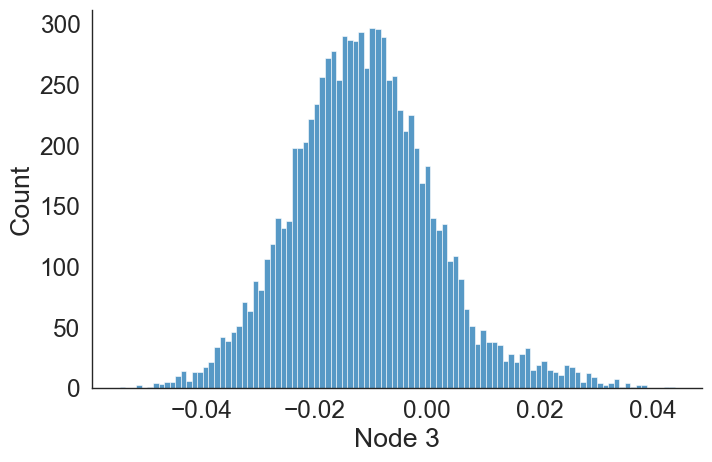

In [6]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Node 3", kind="hist", bins = 100, aspect = 1.5)

Fitting 6 distributions: 100%|███████████████████████████████████████████████████████████| 6/6 [00:07<00:00,  1.23s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
erlang,66.835990,74.412199,-2.338236e+06,inf,0.032964,4.474062e-265
exponnorm,67.258525,44.896116,-2.336470e+06,inf,0.033661,2.216391e-276
logistic,67.423166,-36.743544,-2.335797e+06,inf,0.029533,7.629690e-213
beta,67.508152,79.723197,-2.335419e+06,inf,0.033154,3.881753e-268
norm,84.116987,38.205518,-2.273785e+06,inf,0.043958,0.000000e+00


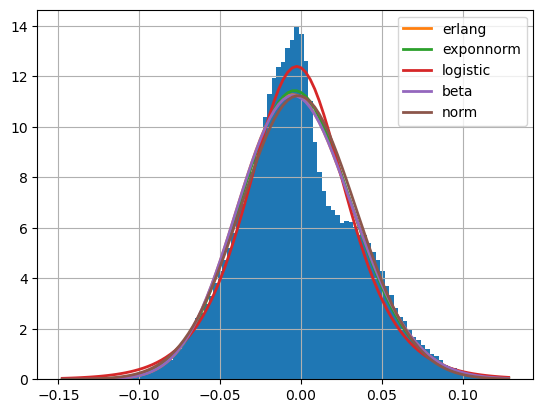

In [3]:
#Hour=df['Hour1'].values
f = Fitter(df , distributions = ['logistic','norm','dweibul', 'erlang', 'exponnorm']
           )
# distributions = ['genhyperbolic','mielke','genlogistic']
f.fit()
f.summary()
#f.get_best(method = 'sumsquare_error')

In [ ]:
#'Beste Verteilung für jede Stunde mit Parametern'
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from fitter import Fitter, get_common_distributions, get_distributions

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check_shift_positive.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

for col in columns:
    # Histogramm plotten
    #sns.set_style('white')
    #sns.set_context("paper", font_scale = 2)
    #sns.displot(data=df, x=col, kind="hist", bins = 100, aspect = 1.5)

    # Verteilung anpassen und Zusammenfassung ausgeben
    data = df[col].values
    f = Fitter(data)
    f.fit()
    f.summary()
    print(f.get_best(method = 'sumsquare_error'))
    #print(f"Beste Verteilung für Spalte {col}: {f.get_best()}")
    #print(f"Zusammenfassung für Spalte {col}: {f.summary()}\n")
    # KS-Test durchführen
    #ks_stat, p_value = stats.kstest(data, best_dist.name, args=best_params)
    #print(f"KS-Test-Statistik für Spalte {col}: {ks_stat:.4f}")
    #print(f"P-Wert für KS-Test für Spalte {col}: {p_value:.4f}")

Fitting 6 distributions: 100%|███████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.06it/s]


IndexError: index 4 is out of bounds for axis 0 with size 4

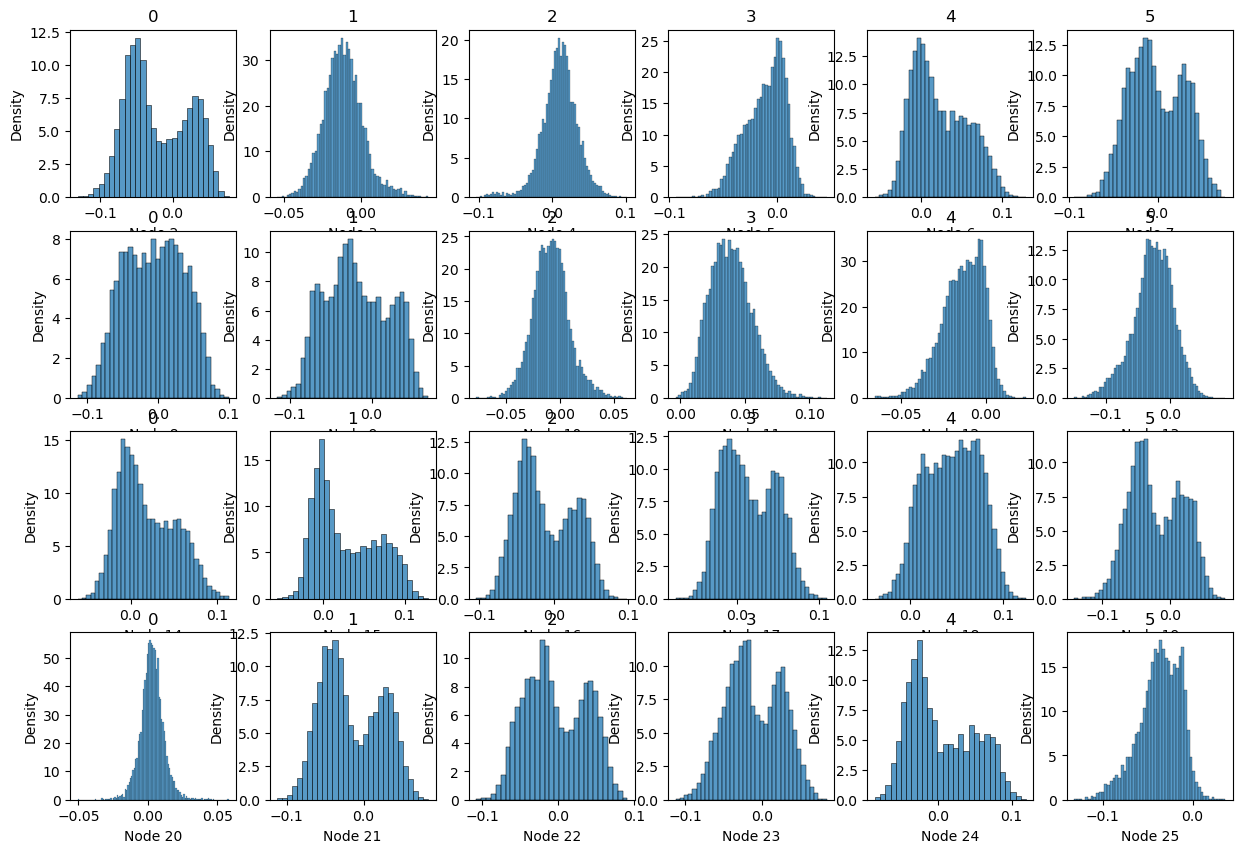

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\ARIMA_Nodal_Error_Timeseries.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Node 2','Node 3','Node 4','Node 5','Node 6','Node 7','Node 8','Node 9','Node 10','Node 11',
'Node 12','Node 13','Node 14','Node 15','Node 16','Node 17','Node 18','Node 19','Node 20','Node 21','Node 22',
'Node 23','Node 24','Node 25','Node 26','Node 27','Node 28','Node 29','Node 30','Node 31','Node 32','Node 33',]

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Bestimmung der besten Verteilung für jede Spalte
best_dists = {}
for col in columns:
    data = df[col].values
    f = Fitter(data, distributions=['gamma', 'lognorm', 'erlang', 'burr', 'norm', 'exponnorm'])
    f.fit()
    if f.get_best() is None:
        print(f'Warning: No best distribution found for column {col}')
    else:
        best_dists[col] = f.get_best()

# Anzahl der Zeilen und Spalten für die Subplots
nrows = 4
ncols = 6

# Plotten der Verteilungen
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 2.5 * nrows))

for i, col in enumerate(columns):
    row = i // ncols  # Berechnen Sie die Zeile für den aktuellen Plot
    col = i % ncols  # Berechnen Sie die Spalte für den aktuellen Plot
    sns.histplot(data=df, x=columns[i], ax=axs[row, col], stat='density')
    x = np.linspace(df[columns[i]].min(), df[columns[i]].max(), 1000)
    dist = best_dists.get(col)  # Holen Sie sich die beste Verteilung für die Spalte
    if dist:
        y = dist.pdf(x)  # Verwenden Sie die PDF der besten Verteilung
        axs[row, col].plot(x, y, color='r', label=dist.name)
        axs[row, col].legend()
    axs[row, col].set_title(col)  # Setzen Sie den Titel der Subplots

plt.tight_layout()
plt.show()
